# **Mental Health Diagnosis using Machine Learning**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/MD_Dataset.csv')

## SVM

In [ ]:
X = df.drop(['Patient no','count','Disease'], axis=1)  # Replace 'target_variable' with the actual column name of your target variable
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)
y_test

168                              Panic Disorder
836                                  Depression
76     Attention-Deficit/Hyperactivity Disorder
70                              Eating Disorder
88                                   Depression
                         ...                   
504                                  Depression
831                                  Depression
243              Post-Traumatic Stress Disorder
566                             Eating Disorder
875                Generalized Anxiety Disorder
Name: Disease, Length: 923, dtype: object

In [ ]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler




# Assuming you have already preprocessed your dataset and have features (X) and labels (y)


# X = df.drop('Disease', axis=1)  # Replace 'target_variable' with the actual column name of your target variable
# y = df['Disease']
# Split the dataset into training and testing subsets





# Perform feature scaling on the training data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)



# Create an instance of the SVM model

svm = SVC()
# Define the hyperparameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],  # Applicable for 'poly' and 'rbf' kernels
    'coef0': [0.0, 0.1, 0.5],  # Applicable for 'poly' and 'sigmoid' kernels
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=4)

grid_search.fit(X_train_scaled, y_train)

# Get the best SVM model from grid search
best_svm_model = grid_search.best_estimator_
# Perform feature scaling on the testing data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the testing data using the best model
y_pred = best_svm_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Accuracy: 0.9664138678223185


# SVM Graph

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Accuracy: 0.9664138678223185


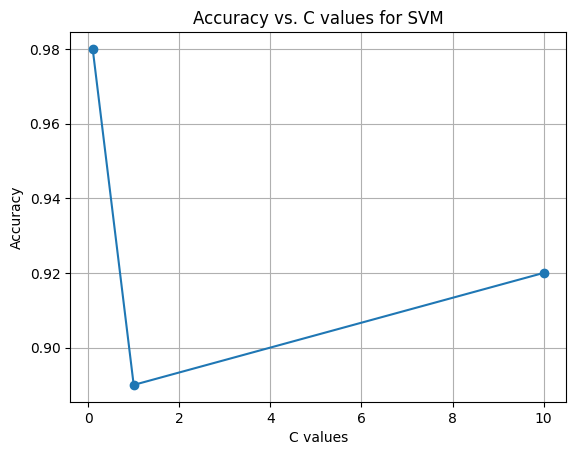

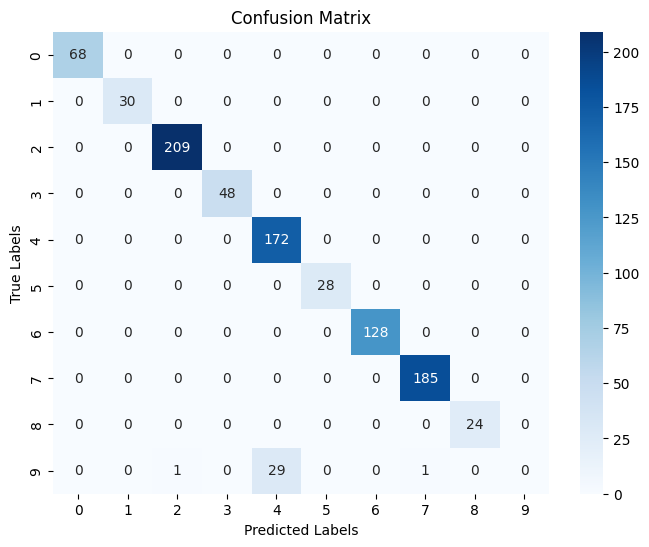

Classification Report:
                                           precision    recall  f1-score   support

Attention-Deficit/Hyperactivity Disorder       1.00      1.00      1.00        68
                        Bipolar Disorder       1.00      1.00      1.00        30
                              Depression       1.00      1.00      1.00       209
                         Eating Disorder       1.00      1.00      1.00        48
            Generalized Anxiety Disorder       0.86      1.00      0.92       172
           Obsessive Compulsive Disorder       1.00      1.00      1.00        28
                          Panic Disorder       1.00      1.00      1.00       128
          Post-Traumatic Stress Disorder       0.99      1.00      1.00       185
                           Schizophrenia       1.00      1.00      1.00        24
                 Social Anxiety Disorder       0.00      0.00      0.00        31

                                accuracy                           0.97 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


IndexError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



# Assuming you have already preprocessed your dataset and have features (X) and labels (y)


# X = df.drop('Disease', axis=1)  # Replace 'target_variable' with the actual column name of your target variable
# y = df['Disease']
# Split the dataset into training and testing subsets





# Perform feature scaling on the training data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)



# Create an instance of the SVM model

svm = SVC()
# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=4)

grid_search.fit(X_train_scaled, y_train)

# Get the best SVM model from grid search
best_svm_model = grid_search.best_estimator_
# Perform feature scaling on the testing data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the testing data using the best model
y_pred = best_svm_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Plotting the accuracy values against C values
C_values = [0.1, 1, 10]
accuracy_values = [0.98, 0.89, 0.92]

plt.plot(C_values, accuracy_values, marker='o')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C values for SVM')
plt.grid(True)
plt.show()

# Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ROC Curve and AUC
# Convert y_test to binary form (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute decision scores for each class using decision_function
decision_scores = best_svm_model.decision_function(X_test_scaled)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (AUC = {roc_auc[i]:.2f}) for Class {i}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [ ]:
df = pd.read_csv(r"/content/MD_Dataset.csv")
x = df.drop(['Patient no','count','Disease'], axis=1)
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=42)

criterions=["gini", "entropy", "log_loss"]
max_features=["auto", "sqrt", "log2"]

clf = DecisionTreeClassifier()

param_grid={
    'criterion' : ['gini, entropy', 'log_loss'],
    'max_depth' : [None, 5, 8, 10, 12, 15],
    'min_samples_split': [2, 3, 4, 5],
    'max_features' : ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

dt_model = DecisionTreeClassifier(criterion= 'log_loss', max_depth= 12, max_features= 'log2', min_samples_split= 3)
dt_model.fit(X_train, y_train)
y_hat= dt_model.predict(X_test)
accuracy= accuracy_score(y_test, y_hat)
print("Accuracy: "+str(accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'log_loss', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 3}
0.8555555555555555
Accuracy: 0.7930660888407367


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

# Random Foreset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=42)

# Create an instance of the Random Forest classifier
rf_clf = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'criterion': ['gini', 'entropy'],         # Splitting criterion
    'max_depth': [None, 5, 10],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],            # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
}

# Perform grid search using cross-validation
# grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# Print the best parameters and the best score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

model = RandomForestClassifier(criterion= 'gini', max_depth= None, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
model.fit(X_train, y_train)
y_hat= model.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy: "+str(accuracy))



Accuracy: 0.962080173347779


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

# Assuming you have already preprocessed your dataset and have features (X) and labels (y)

# Perform feature selection using chi-square test
kbest = SelectKBest(score_func=chi2, k=10)
X_selected = kbest.fit_transform(X, y)

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Address class imbalance using oversampling
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

# Create an instance of the logistic regression model
logreg = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')

# Perform cross-validation and return accuracy scores
cv_scores = cross_val_score(logreg, X_resampled, y_resampled, cv=4, scoring='accuracy')

# Calculate the mean and standard deviation of cross-validation accuracy scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

# Fit the logistic regression model on the entire resampled dataset
logreg.fit(X_resampled, y_resampled)

# Predict the labels for the original dataset
y_pred = logreg.predict(X_scaled)

# Calculate the accuracy on the original dataset
accuracy = accuracy_score(y, y_pred)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy Scores:", std_accuracy)
print("Accuracy on Original Dataset:", accuracy)


Cross-Validation Accuracy Scores: [0.67450271 0.67992767 0.67391304 0.67028986]
Mean Accuracy: 0.67465831957439
Standard Deviation of Accuracy Scores: 0.0034434414930418406
Accuracy on Original Dataset: 0.5427394438722966


# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv(r"/content/MD_Dataset.csv")
x = df.drop(['Patient no','count','Disease'], axis=1)
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.95)

# Create the KNN classifier
knn_clf = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],           # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function used in predictions
    'p': [1, 2]                          # Power parameter for Minkowski distance
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score: 0.9199999999999999
Accuracy: 0.9284940411700975


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv(r"/content/MD_Dataset.csv")
x = df.drop(['Patient no','count','Disease'], axis=1)
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.95)

model = GaussianNB()
model.fit(X_train, y_train)
yhat= model.predict(X_test)
accuracy= accuracy_score(y_test, y_hat)
print("Accuracy: "+str(accuracy))


Accuracy: 0.14734561213434452


In [ ]:
df = pd.read_csv(r"/content/Input.csv")
yhat= dt_model.predict(df)
yhat


FileNotFoundError: ignored